## Разведочный анализ

Подключитесь к базе данных PostgreSQL и выгрузите таблицу `exploratory`, сохранив ее в датафрейм. <br> <br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `db_ds_students`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`.

In [3]:
pip install psycopg2-binary

In [4]:
import psycopg2
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew

In [5]:
pg_connection ={
    "host":"dsstudents.skillbox.ru",
    "port":5432,
    "dbname":"db_ds_students",
    "user":"readonly",
    "password":"6hajV34RTQfmxhS"
}

conn = psycopg2.connect(**pg_connection)

cursor = conn.cursor()

df = pd.read_sql_query("SELECT * FROM exploratory", conn)

conn.commit()

for col in df.columns:
    df[col]= df[col].astype(float)

df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,2.439930,-2.180961,33.468496,-1.927388,-5.321392
1,1.770580,-1.174880,0.989593,-1.139681,-2.080220
2,0.742817,-0.263483,0.168149,-0.332438,-0.195720
3,-1.510892,2.712571,-2.685643,2.058495,-4.098402
4,-0.483511,0.096511,-0.028703,0.168763,-0.046664


Постройте гистограммы распределения для каждой переменной. Поэксперементируйте с количеством "разбивок" (bins). Опишите распределение каждой переменной. В каких областях (пример: от нуля до 2 расположено примерно треть всех значений) сосредоточено больше значений, в каких меньше. 

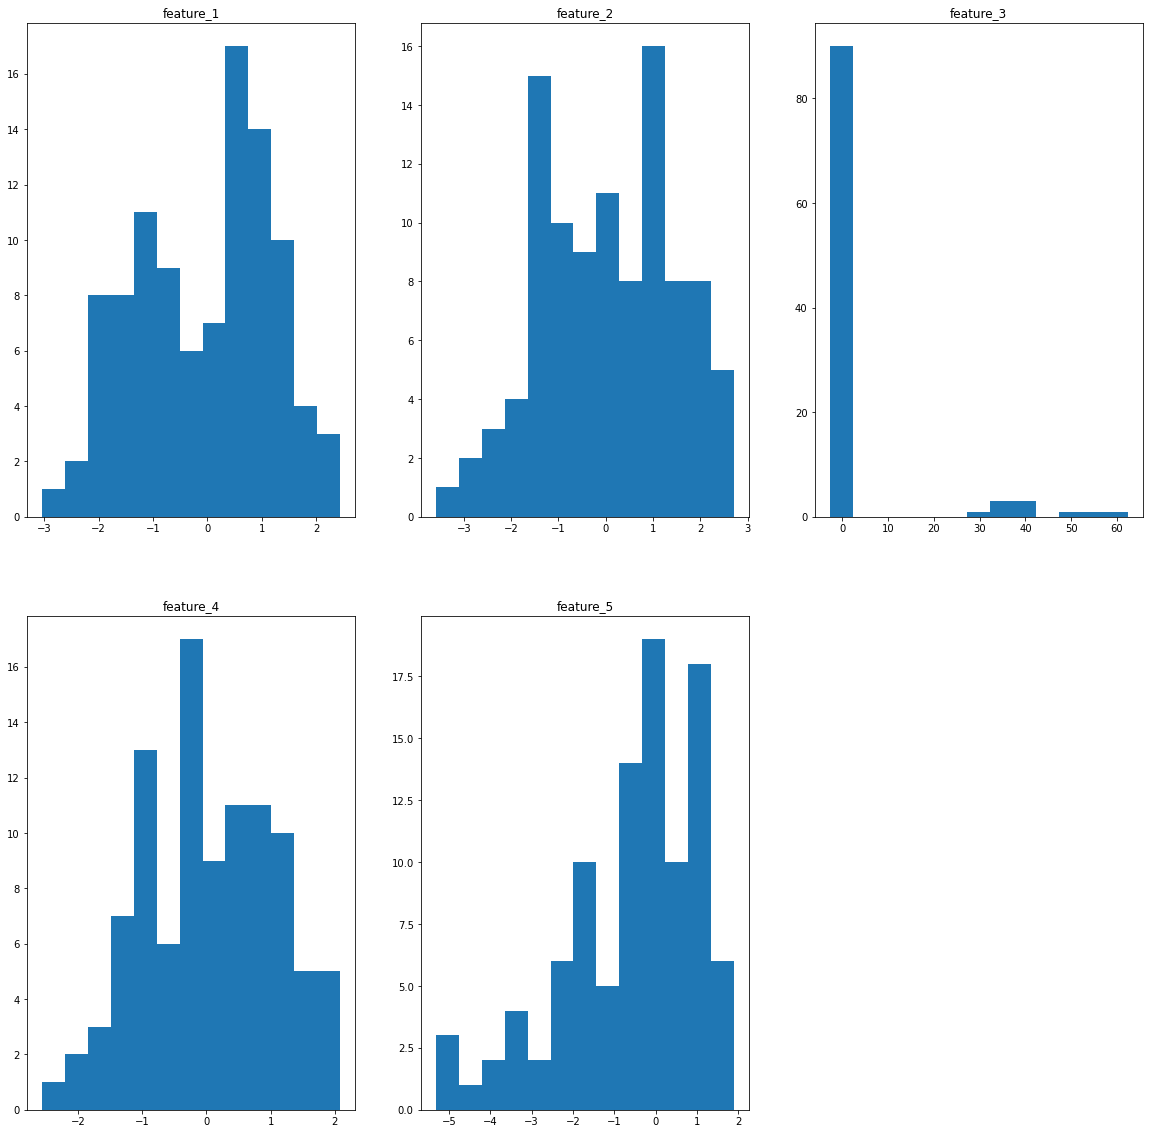

In [6]:
fig = plt.figure(figsize=(20,20))

i=231
for col in df.columns:
    subplot = fig.add_subplot(i) 
    subplot.hist(df[col].values, bins=13, histtype='bar')
    subplot.set_title(col)
    i+=1

plt.show()

Очень похоже, что все распределения ассиметричные, но feature_2 и feature_4 похожи на нормальное распределение. Равномерных распределений нет.

Постройте ящик с усами для каждой переменной. Опишите распределение данных. Прокомментируйте наличие или отсутствие выбросов.

In [7]:
for col in df.columns:
    print("Column",col)
    print("Mean", df[col].mean())
    print('Dispersion',df[col].std()**2)
    print('50%',np.percentile(df[col], 50))
    print('75%',np.percentile(df[col], 75))
    print('99%',np.percentile(df[col], 99))
    print("**********************")

Column feature_1
Mean -0.06508531831576019
Dispersion 1.5590247720787005
50% 0.17154031798612412
75% 0.8789591211748633
99% 2.290746038185086
**********************
Column feature_2
Mean 0.03751919306909971
Dispersion 2.015551994727317
50% 0.00014851663636010481
75% 1.1869747287203842
99% 2.6003555914953624
**********************
Column feature_3
Mean 3.958900212699037
Dispersion 176.8998713477922
50% -0.046935604424425126
75% 1.0893426349608026
99% 56.54982092655189
**********************
Column feature_4
Mean 0.03829395027721471
Dispersion 1.060998031938724
50% 0.0007938169968874573
75% 0.886190644214635
99% 2.058771765490835
**********************
Column feature_5
Mean -0.6023731436026644
Dispersion 2.750970609526369
50% -0.25171202903721324
75% 0.7076747370447434
99% 1.765836296045183
**********************


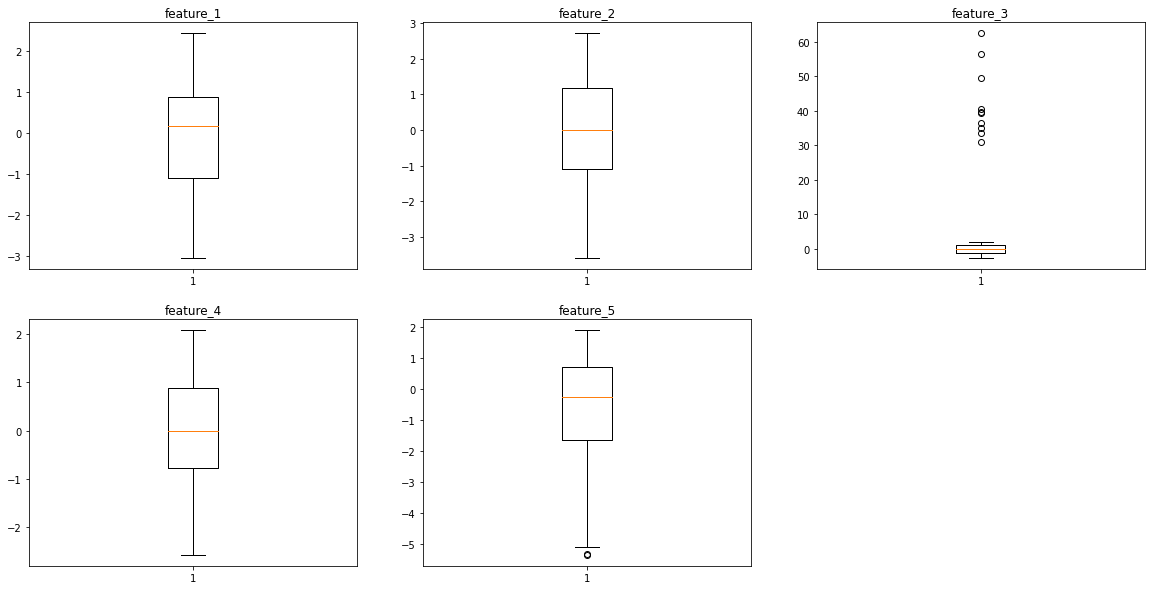

In [8]:
fig = plt.figure(figsize=(20,10))

i=231
for col in df:
    subplot = fig.add_subplot(i) 
    subplot.boxplot(df[col].values)
    subplot.set_title(col)
    i+=1

plt.show()

Допустим, мы хотим построить регрессионную модель по имеющимся данным и исследовать влияние остальных переменных на переменную `feature_4`. Постройте диаграммы рассеяния. Определите по графикам, какие независимые переменные имело бы смысл включить в модель регрессии?

In [41]:
for col in df:
    print("Column ", col)
    print("kurtosis", kurtosis(df[col]))
    print("skew", skew(df[col]))
    print("***************")

Column  feature_1
kurtosis -0.9224536985617497
skew -0.16561717398750475
***************
Column  feature_2
kurtosis -0.7546732315109836
skew -0.1505876642777299
***************
Column  feature_3
kurtosis 7.403063045481574
skew 2.9262040864568406
***************
Column  feature_4
kurtosis -0.7102462902322091
skew -0.0951489985683936
***************
Column  feature_5
kurtosis 0.5041836364333312
skew -0.9652681949411276
***************


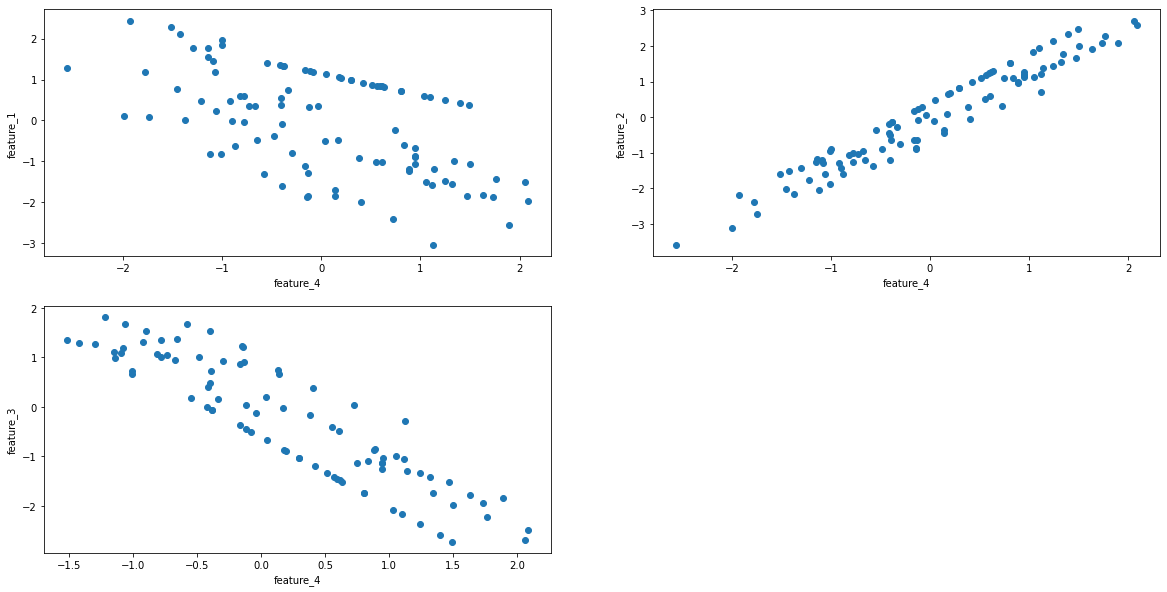

In [42]:
fig = plt.figure(figsize=(20,10))
feature_4 = df['feature_4'].values
df_test = df[['feature_1','feature_2', 'feature_3']]
#убираем выбросы
df_test.loc[:,'feature_3'] = df[df['feature_3']<20]['feature_3'].copy()
i=221
for col in df_test:
    subplot = fig.add_subplot(i) 
    subplot.scatter(feature_4, df_test[col])
    subplot.set_xlabel('feature_4')
    subplot.set_ylabel(col)
    i+=1

plt.show()

In [ ]:
# видно что есть связть feature_2 и feature_3 их можно включать в модель регрессии. в feature_1 разброс больше, не понятно что с этим делать.